In [1]:
import tensorflow

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train), (x_test,y_test)= mnist.load_data() #mnist라는 클래스에서 load_data 함수 불러오기

In [5]:
type(x_train)

numpy.ndarray

In [6]:
x_train.shape 
# 60000개의 이미지
# 사이즈 28*28

(60000, 28, 28)

## 이미지 visualization

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

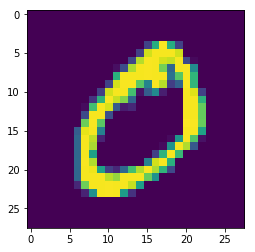

In [8]:
first_letter=x_train[1] 
plt.imshow(first_letter)

In [9]:
y_train.shape # 데이터의 사이즈 확인 총 60000개의 데이터가 있고 x의 레이블 데이터와 매칭 

(60000,)

In [10]:
y_train[1]

0

In [11]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Pre-processing
- x: 60000*28*28 -> 60000*784
- y: multiclass -> bynary class (5이면 1, 5가 아니면 0)

In [12]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_test.shape

(10000, 784)

In [15]:
y_train_5 = (y_train==5) # y_train가 5이면 T 아니면 F
y_test_5 = (y_test==5)# y_test가 5이면 T 아니면 F

In [16]:
y_train_5[1] # test 데이터 셋의 첫번째 레이블 2이므로 5가 아님 

False

# Classification

- (x_train,y_train_5) 이를 통해 학습
- (x_test) -> 이걸로 예측 
- classification accuracy = 정확히 예측한 샘플 수 / 전체 샘플수 
- classification accuracy 가 높다고 해서 정확히 예측했다고 말할 수 없다. 그때 그때 달라요.

In [17]:
from sklearn.linear_model import  SGDClassifier

In [18]:
sgd_clf=SGDClassifier()

In [19]:
sgd_clf.fit(x_train,y_train_5)# 5이면 T, 5가 아니면 F

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [20]:
y_test[1] # test 데이터 셋의 첫번째 레이블 2이므로 5가 아님 

2

In [21]:
sgd_clf.predict([x_test[1,]]) # 예측 값은 false (5가 아님)

array([False])

In [22]:
sgd_clf.predict(x_test)

array([False, False, False, ..., False,  True, False])

## Imbalanced classification

클래스 사이즈가 
0인 경우와 1인 경우의 비율이 5:5 인 경우 = balanced <br>
<br>
0인 경우와 1인 경우의 비율이 1:9 인 경우 = imbalanced <br>
거의 대부분이 1이기 때문에 선을 잘 못 그음. <br>
전부 1로 나올 수 있음 (오버피팅)과적합문제 발생<br>
이를 해결하기 위해서는 recall, precision, f1 스코어 모두 고려해보기


5- cross validation SGD linear model 의 정확도(accuracy) 평가

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=5,scoring='accuracy')

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

array([0.96866928, 0.95783333, 0.95308333, 0.94275   , 0.8332361 ])

In [24]:
from sklearn.base import BaseEstimator

In [25]:
import numpy as np

In [26]:
# fit 없이 무조건 0으로 prediction
class Never5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [27]:
never_5_clf=Never5Classifier()

In [28]:
cross_val_score(never_5_clf,x_train,y_train_5,cv=5,scoring='accuracy')

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

### NOTE: class size 불균형이 심할 때는, classificaiton accuracy 외에도 recall, precision, f1-score 들을 참조 해야한다. 

## Confusion matrix

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=5) # 예측한 값을 넣어준게 y_train

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

In [31]:
## prediction -> confusion matrix
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_train_5,y_train_pred)

array([[52626,  1953],
       [  894,  4527]], dtype=int64)

In [33]:
53279+1300 # class 가 5가 아닌 것의 개수

54579

In [34]:
1495+3926 # class 가 5인 것들의 개수

5421

In [35]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [36]:
recall_score(y_train_5,y_train_pred) #3926/(1495+3926)

0.8350857775318207

In [37]:
3926/(1495+3926)

0.7242206235011991

In [38]:
# recall 이 높다는 건 적극적으로 positive를 했다는 것. = 양성이라고 판명한 것들중에서
# true positive의 비율은 내려간다. 

In [39]:
precision_score(y_train_5,y_train_pred) # 3926/(1300+3926)

0.6986111111111111

In [40]:
3926/(1300+3926)

0.7512437810945274

In [41]:
f1_score(y_train_5,y_train_pred)

0.7607764053440887

In [42]:
y_test[9988] # 레이블이 5인 것에 대해서 decision function을 만들어봄 

5

In [43]:
y_scores = sgd_clf.decision_function([x_test[9988]])

In [44]:
y_scores

array([161223.06758092])

In [45]:
threshold=300000 #임계값
y_pred=(y_scores>threshold)

In [46]:
y_pred # 0보다 크면 true, 아니면 negative

array([False])

## 결론 
### threshold(임계값)가 커지면 음성, 작아지면 양성 

- 로지스틱 회귀 값을 이진 카테고리에 매핑(Mapping)하려면 분류 임계값(Classification Threshold, 결정 임계값이라고도 함)을 정의해야 합니다.



- 임계값보다 높은 값은 '스팸'을 나타내고 임계값보다 낮은 값은 '스팸이 아님'을 나타냅니다. 분류 임계값은 항상 0.5여야 한다고 생각하기 쉽지만 임계값은 문제에 따라 달라지므로 값을 조정해야 합니다.

In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [48]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv=5,method='decision_function')

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

In [49]:
y_scores

array([ 258173.87499752, -516131.41891019, -822557.34652663, ...,
        302934.61209367, -138401.38232964, -201873.27491232])

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

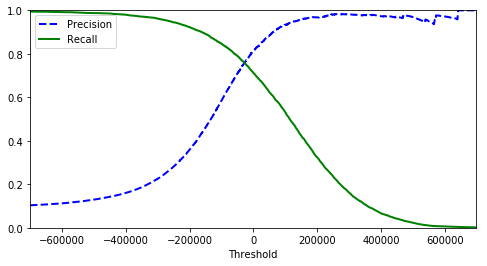

In [51]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label='Precision',linewidth=2)
    plt.plot(thresholds, recalls[:-1],"g-",label='Recall',linewidth=2)
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
plt.xlim([-700000,700000])
plt.show()

## 결론
### recall 과 precision 이 서로 상충관계에 있다. 
### 적절한 임계값은 그때그때 달라요..

# ROC 곡선

In [52]:
from sklearn.metrics import roc_curve

In [53]:
fpr, tpr, thresholds= roc_curve(y_train_5,y_scores)

In [54]:
fpr # false positive rate

array([0.00000000e+00, 0.00000000e+00, 1.83220653e-05, ...,
       9.93770498e-01, 9.93770498e-01, 1.00000000e+00])

In [55]:
tpr # true postitive rate

array([1.84467810e-04, 4.24275964e-03, 4.24275964e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [56]:
thresholds # 임계값

array([  896019.3326792 ,   642314.82984938,   640368.47211258, ...,
       -1458613.61947087, -1459275.16154884, -2681167.12895023])

In [57]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, linewidth=2)
    plt.plot([0,1],[0,1],'k--') # classification이 worst인 경우 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

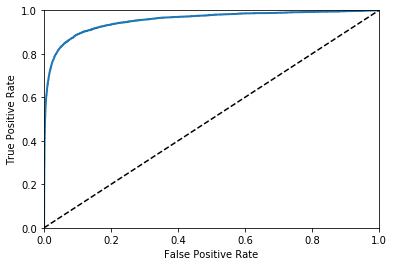

In [58]:
plot_roc_curve(fpr,tpr)

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_train_5,y_scores)

0.9546241599078744

In [61]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
forest_clf=RandomForestClassifier(random_state=42)

In [63]:
y_probas_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=5,method='predict_proba')

In [64]:
y_probas_forest # 0번째 칼럼 -> 5가 아닐 확률, 1번째 칼럼 -> 5일 확률 

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [65]:
y_scores_forest=y_probas_forest[:,1] # 2열 값을 score로 쓴다

In [66]:
fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_train_5,y_scores_forest)

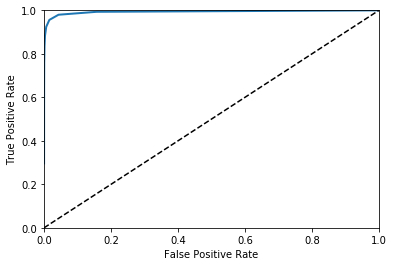

In [67]:
plot_roc_curve(fpr_forest, tpr_forest)

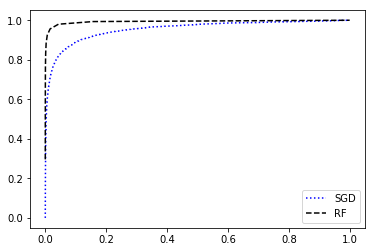

In [68]:
plt.plot(fpr,tpr,'b:',label='SGD') # SGD ROC
plt.plot(fpr_forest,tpr_forest,'k--',label='RF') # RF ROC
plt.legend(loc='lower right')

In [69]:
roc_auc_score(y_train_5,y_scores_forest)

0.9933511587661912

# Multiclass classfication

In [70]:
# 지금까지는 5 vs. 5가 아닌 것으로만 분류 했는데
# 이제는 10개의 클래스를 모두 고려

In [71]:
sgd_clf.fit(x_train,y_train) # 10개 클래스로 학습 (학습데이터 이용) - 0ne-vs-Rest 방법을 이용

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [72]:
sgd_clf.predict([x_test[1,:]])

array([2], dtype=uint8)

In [73]:
y_test[1]

2

One-vs.-Rest 방법을 이용하기 때문에 confidence score 산출

In [74]:
confidence_score=sgd_clf.decision_function([x_test[1,:]])

In [75]:
confidence_score

array([[ -422483.02134003,  -514286.02913731,   375703.24127678,
         -225104.14848092, -1243155.89973393,  -177599.58500674,
         -219495.27418888, -1246594.98113589,  -620895.35157507,
        -1223776.47918165]])

In [76]:
np.argmax(confidence_score)

2

## One-vs-One 방법을 쓰고싶다..

In [77]:
from sklearn.multiclass import OneVsOneClassifier

In [78]:
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

In [79]:
ovo_clf.fit(x_train,y_train)

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [80]:
ovo_clf.predict([x_test[1,:]])

array([2], dtype=uint8)

In [81]:
ovo_clf.estimators_ # 45개의 클래시파이어가 나와있다. 

(SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(a

In [82]:
type(ovo_clf.estimators_) #튜플의 형태이고(각각의 엘리먼트가 페어와이즈? )

tuple

In [83]:
len(ovo_clf.estimators_) # 총길이는 45

45

## Random forest, decision tree, LVA는 OvsR, OvsO 이런거 안 써도 된다..

In [84]:
forest_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
forest_clf.predict([x_test[1,:]])

array([2], dtype=uint8)

## SGD classifier 의 classification performance? accuracy

In [86]:
cross_val_score(sgd_clf, x_train,y_train,cv=5,scoring='accuracy') # cross-validation = 5

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

array([0.8666389 , 0.84810865, 0.83591667, 0.81828791, 0.88446149])

In [87]:
from sklearn.preprocessing import StandardScaler 
#데이터 표준화, 각 데이터의 range나 scale이 다를 수 있으니 표준화시킨다. 

In [88]:
scaler=StandardScaler() # (x-mu(평균))/std(표준편차)

In [89]:
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64)) # 기존의 값을 정수의 형태로 저장

In [90]:
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=5,scoring='accuracy')
# training data의 인풋 밸류를 표준화 시켜야 예측 결과가 좀 더 좋게 나온다. 

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

array([0.91070387, 0.90751541, 0.90858333, 0.90655997, 0.91730577])

## Error analysis (오분류)

1) confusion matrix를 먼저 그리고 <br>
2) 어느 부분이 에러가 났는지? 확인하고 <br>
3) 실제 데이터 (오분류된)로 파악 

In [91]:
y_train_pred = cross_val_predict(sgd_clf,x_train_scaled, y_train, cv=5)

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

In [92]:
conf_mx = confusion_matrix(y_train,y_train_pred)

In [93]:
conf_mx

array([[5732,    2,   23,    9,   11,   49,   46,    9,   39,    3],
       [   2, 6455,   40,   28,    5,   43,    7,   12,  137,   13],
       [  58,   38, 5321,   99,   79,   29,   93,   60,  166,   15],
       [  51,   37,  134, 5339,    1,  241,   35,   55,  139,   99],
       [  22,   27,   36,    9, 5358,    9,   59,   30,   88,  204],
       [  74,   38,   33,  185,   76, 4603,  112,   27,  183,   90],
       [  32,   23,   43,    2,   41,   89, 5633,    4,   51,    0],
       [  31,   18,   69,   29,   56,   11,    6, 5790,   16,  239],
       [  55,  144,   69,  147,   12,  163,   52,   28, 5036,  145],
       [  45,   29,   27,   90,  148,   41,    2,  187,   82, 5298]],
      dtype=int64)

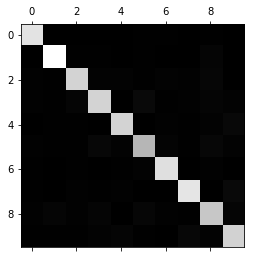

In [94]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()
# 숫자가 높으면 밝게 아니면 어둡게 

In [95]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [96]:
norm_conf_mx

array([[9.67752828e-01, 3.37666723e-04, 3.88316731e-03, 1.51950025e-03,
        1.85716698e-03, 8.27283471e-03, 7.76633463e-03, 1.51950025e-03,
        6.58450110e-03, 5.06500084e-04],
       [2.96647879e-04, 9.57431029e-01, 5.93295758e-03, 4.15307031e-03,
        7.41619697e-04, 6.37792940e-03, 1.03826758e-03, 1.77988727e-03,
        2.03203797e-02, 1.92821121e-03],
       [9.73481034e-03, 6.37797919e-03, 8.93084928e-01, 1.66163142e-02,
        1.32594830e-02, 4.86740517e-03, 1.56092649e-02, 1.00704935e-02,
        2.78616986e-02, 2.51762336e-03],
       [8.31838199e-03, 6.03490458e-03, 2.18561409e-02, 8.70820421e-01,
        1.63105529e-04, 3.93084326e-02, 5.70869352e-03, 8.97080411e-03,
        2.26716686e-02, 1.61474474e-02],
       [3.76583362e-03, 4.62170490e-03, 6.16227319e-03, 1.54056830e-03,
        9.17151660e-01, 1.54056830e-03, 1.00992811e-02, 5.13522766e-03,
        1.50633345e-02, 3.49195481e-02],
       [1.36506180e-02, 7.00977679e-03, 6.08743774e-03, 3.41265449e-02,
   

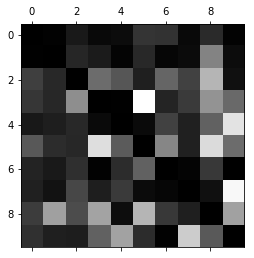

In [97]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
# 밝게 나올 수록 오분류가 많이 난 것들 
# 3-> 5
# 5-> 3
# 4-> 9
# 7-> 9
# 9-> 7

In [105]:
# 원래는 각 오류가 난 인덱스를 하나하나 찾아서 봐야 하지만
# 이를 함수화 시켜줌 
def plot_digits(instances, images_per_row=10,**options):
    size=28
    images_per_row=min(len(instances),images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1)// images_per_row +1
    row_images=[]
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1)* images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,**options)
    plt.axis("off")

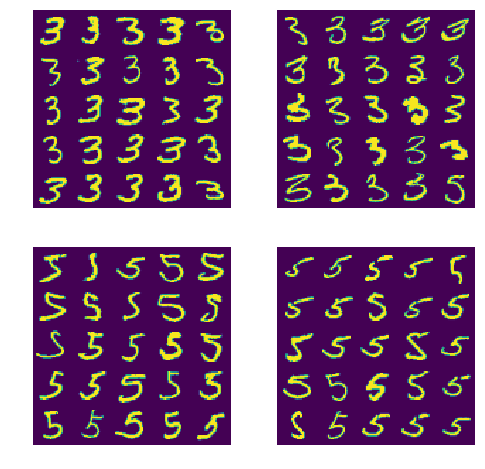

In [106]:
cl_a, cl_b = 3,5
x_aa = x_train[(y_train ==cl_a)&(y_train_pred == cl_a)] # 실제로 3인데 3으로 분류된 것 
x_ab = x_train[(y_train ==cl_a)&(y_train_pred == cl_b)] # 실제로 3인데 5로 분류된 것
x_ba = x_train[(y_train ==cl_b)&(y_train_pred == cl_a)] # 실제로 5인데 3으로 분류된 것
x_bb = x_train[(y_train ==cl_b)&(y_train_pred == cl_b)] # 실제로 5인데 5로 분류된 것
plt.figure(figsize=(8,8)) 

# 다 부른 게 아니라 처음부터 25개인 것만 불러옴
plt.subplot(221); plot_digits(x_aa[:25],images_per_row=5) 
plt.subplot(222); plot_digits(x_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25],images_per_row=5)
plt.show()

결론 <br>
1) 눈으로 봤을때 구분이 되는데 구분을 못하는 걸 보니 모델의 성능이 떨어진다 <br>
아마 linear model 이라 복잡한 부분 을 못잡았기 때문이지 않을까 하는 생각 <br>
2) 전처리를 할 때 rotation, shift (중심축을 옮기면/약간의 회전을 시키면) 더 좋은 모델이 나오지 않을까 <br>
3) 모델을 비선형으로 만들면 더 좋지 않을까 

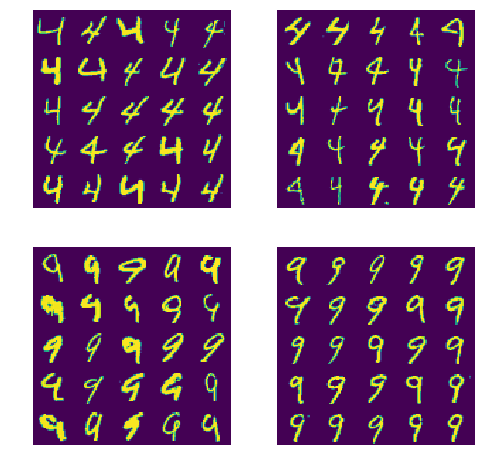

In [108]:
cl_a, cl_b = 4,9
x_aa = x_train[(y_train ==cl_a)&(y_train_pred == cl_a)] # 실제로 3인데 3으로 분류된 것 
x_ab = x_train[(y_train ==cl_a)&(y_train_pred == cl_b)] # 실제로 3인데 5로 분류된 것
x_ba = x_train[(y_train ==cl_b)&(y_train_pred == cl_a)] # 실제로 5인데 3으로 분류된 것
x_bb = x_train[(y_train ==cl_b)&(y_train_pred == cl_b)] # 실제로 5인데 5로 분류된 것
plt.figure(figsize=(8,8)) 

# 다 부른 게 아니라 처음부터 25개인 것만 불러옴
plt.subplot(221); plot_digits(x_aa[:25],images_per_row=5) 
plt.subplot(222); plot_digits(x_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25],images_per_row=5)
plt.show()

중요한 것은 ! <br>
사진을 보고 어떻게 개선시킬지 생각하고 느끼는게 중요 

# 4장. 

## 선형회귀분석

y= f(x) y값이 numerical 변수의 경우 <br> - ((x값 앞에 붙어있는 것들=베타)parametric(모형에 가정이 있는 경우: 모수적 방법), nonparametric(가정이 없다.예를들어 decision tree, random forest, kernerlly regression) <br>
y= f(x) y값이 categorical 변수의 경우

선형회귀분석 = 모수적 방법/ 가정이 있다 = 모형이 선형이다. / 에러텀에 대해서 가정이 있는데 ~ N(0,시그마제곱)